In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

In [6]:
# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=04dea480d5e90a2d96afcfa60384e463


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atherton
Processing Record 2 of Set 1 | tabiauea
City not found. Skipping...
Processing Record 3 of Set 1 | casablanca
Processing Record 4 of Set 1 | chapais
Processing Record 5 of Set 1 | mwinilunga
Processing Record 6 of Set 1 | korla
City not found. Skipping...
Processing Record 7 of Set 1 | langsa
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | puerto gaitan
City not found. Skipping...
Processing Record 12 of Set 1 | ous
Processing Record 13 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 14 of Set 1 | olafsvik
City not found. Skipping...
Processing Record 15 of Set 1 | adrar
Processing Record 16 of Set 1 | victoria
Processing Record 17 of Set 1 | ostrovnoy
Processing Record 18 of Set 1 | adjumani
Processing Record 19 of Set 1 | mataura
Processing

Processing Record 35 of Set 4 | warri
Processing Record 36 of Set 4 | kodiak
Processing Record 37 of Set 4 | rudersdorf
Processing Record 38 of Set 4 | pangnirtung
Processing Record 39 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 40 of Set 4 | zhongshu
Processing Record 41 of Set 4 | marawi
Processing Record 42 of Set 4 | ponta do sol
Processing Record 43 of Set 4 | ornskoldsvik
Processing Record 44 of Set 4 | henties bay
Processing Record 45 of Set 4 | hambantota
Processing Record 46 of Set 4 | lavrentiya
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | pitimbu
Processing Record 49 of Set 4 | vila velha
Processing Record 50 of Set 4 | coahuayana
Processing Record 1 of Set 5 | goderich
Processing Record 2 of Set 5 | mamu kanjan
Processing Record 3 of Set 5 | montlucon
Processing Record 4 of Set 5 | sulangan
Processing Record 5 of Set 5 | matagami
Processing Record 6 of Set 5 | batagay-alyta
Processing Record 7 of Set 5 | hofn
Proce

Processing Record 22 of Set 8 | warqla
City not found. Skipping...
Processing Record 23 of Set 8 | paamiut
Processing Record 24 of Set 8 | basarabeasca
Processing Record 25 of Set 8 | datong
Processing Record 26 of Set 8 | catuday
Processing Record 27 of Set 8 | ponta delgada
Processing Record 28 of Set 8 | krasnaya gorbatka
Processing Record 29 of Set 8 | masterton
Processing Record 30 of Set 8 | lagoa
Processing Record 31 of Set 8 | northam
Processing Record 32 of Set 8 | saint-louis
Processing Record 33 of Set 8 | stawell
Processing Record 34 of Set 8 | banjar
Processing Record 35 of Set 8 | parkes
Processing Record 36 of Set 8 | samarai
Processing Record 37 of Set 8 | huesca
Processing Record 38 of Set 8 | turukhansk
Processing Record 39 of Set 8 | waterford
Processing Record 40 of Set 8 | kruisfontein
Processing Record 41 of Set 8 | camopi
Processing Record 42 of Set 8 | nanortalik
Processing Record 43 of Set 8 | talcher
Processing Record 44 of Set 8 | kulhudhuffushi
Processing Re

Processing Record 8 of Set 12 | fasa
Processing Record 9 of Set 12 | luis correia
Processing Record 10 of Set 12 | saint-francois
Processing Record 11 of Set 12 | atotonilco el grande
Processing Record 12 of Set 12 | kondinskoye
Processing Record 13 of Set 12 | nikel
Processing Record 14 of Set 12 | cape coast
Processing Record 15 of Set 12 | champerico
Processing Record 16 of Set 12 | coihaique
Processing Record 17 of Set 12 | port blair
Processing Record 18 of Set 12 | novyy yarychiv
Processing Record 19 of Set 12 | sangar
Processing Record 20 of Set 12 | rivers
Processing Record 21 of Set 12 | te anau
Processing Record 22 of Set 12 | pak phanang
Processing Record 23 of Set 12 | sydney mines
Processing Record 24 of Set 12 | iskateley
Processing Record 25 of Set 12 | nanyang
Processing Record 26 of Set 12 | melito di porto salvo
Processing Record 27 of Set 12 | half moon bay
Processing Record 28 of Set 12 | la ronge
Processing Record 29 of Set 12 | kankaanpaa
Processing Record 30 of S

In [9]:
len(city_data)

578

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atherton,-17.27,145.48,75.20,88,96,3.36,AU,2019-12-27 17:52:24
1,Casablanca,33.60,-7.62,64.40,63,55,5.82,MA,2019-12-27 17:50:18
2,Chapais,49.78,-74.86,30.20,100,90,11.41,CA,2019-12-27 17:52:25
3,Mwinilunga,-11.73,24.43,65.97,96,100,3.00,ZM,2019-12-27 17:52:25
4,Langsa,4.47,97.97,73.92,84,58,1.81,ID,2019-12-27 17:44:22
5,Bluff,-23.58,149.07,69.96,70,59,14.99,AU,2019-12-27 17:44:23
6,Rikitea,-23.12,-134.97,77.05,85,93,13.94,PF,2019-12-27 17:44:19
7,Ous,60.91,61.52,8.87,93,100,7.18,RU,2019-12-27 17:44:35
8,Adrar,27.87,-0.29,71.60,21,100,13.87,DZ,2019-12-27 17:52:26
9,Victoria,5.28,115.24,80.60,78,75,2.24,BN,2019-12-27 17:39:32


In [11]:
# new column order
new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atherton,AU,2019-12-27 17:52:24,-17.27,145.48,75.20,88,96,3.36
1,Casablanca,MA,2019-12-27 17:50:18,33.60,-7.62,64.40,63,55,5.82
2,Chapais,CA,2019-12-27 17:52:25,49.78,-74.86,30.20,100,90,11.41
3,Mwinilunga,ZM,2019-12-27 17:52:25,-11.73,24.43,65.97,96,100,3.00
4,Langsa,ID,2019-12-27 17:44:22,4.47,97.97,73.92,84,58,1.81
...,...,...,...,...,...,...,...,...,...
573,Igrim,RU,2019-12-27 17:54:11,63.19,64.42,8.74,95,100,7.29
574,Bilibino,RU,2019-12-27 17:44:39,68.06,166.44,-22.40,100,4,2.01
575,Dingle,PH,2019-12-27 17:54:12,11.00,122.67,73.13,90,10,6.38
576,Nyaunglebin,MM,2019-12-27 17:54:12,17.95,96.73,65.89,71,0,4.47


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

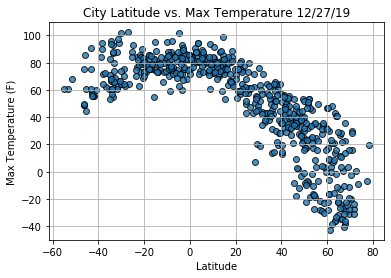

In [14]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

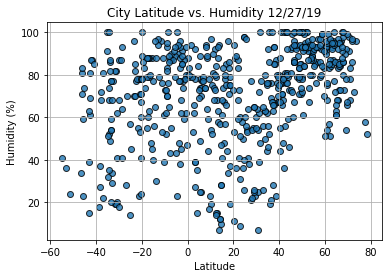

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

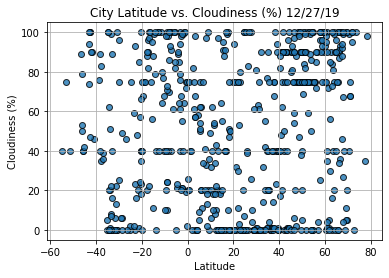

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

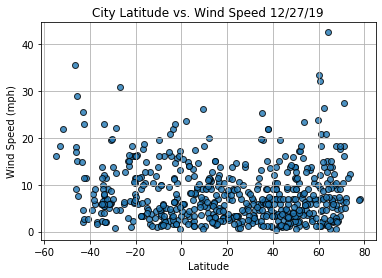

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()